In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime

In [2]:
# Load the data
with open('./data/technical_data.pkl', 'rb') as f:
    data = pd.read_pickle(f)

# Add 'Make' column for each brand
for make, records in data.items():
    for record in records:
        record['Make'] = make

# Combine all records into a single DataFrame
data_df = []
for make, records in data.items():
    data_df.extend(records)
data_df = pd.DataFrame(data_df)

In [3]:
# Display the first few rows of the DataFrame
data_df.head()

,Vehicle condition,Category,Vehicle Number,Availability,Origin,Mileage,Cubic Capacity,Power,Drive type,Fuel,...,Fuel price,Vehicle tax,Construction Year,Support load,"Possible CO₂ costs over the next 10 years (15,000 km/year)2","Commercial, Export/Import",Sliding door,Battery capacity (in kWh),Battery,Other energy source
0,Used vehicle,Estate Car,0337D,Now,German edition,"107,295 km","1,968 ccm",110 kW (150 hp),Internal combustion engine,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Used vehicle,Estate Car,NaN,NaN,German edition,"98,844 km","1,984 ccm",185 kW (252 hp),Internal combustion engine,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Used vehicle,SUV / Off-road Vehicle / Pickup Truck,0326I,Now,German edition,"83,181 km","1,984 ccm",132 kW (179 hp),Internal combustion engine,"Petrol, E10-enabled",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Used vehicle, Accident-free",Saloon,NaN,NaN,NaN,"92,000 km","2,967 ccm",180 kW (245 hp),Internal combustion engine,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Used vehicle,Saloon,0286H,Now,German edition,"110,244 km","1,984 ccm",140 kW (190 hp),Internal combustion engine,"Petrol, E10-enabled",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display the DataFrame info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 48 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Vehicle condition                                            4005 non-null   object
 1   Category                                                     4005 non-null   object
 2   Vehicle Number                                               2320 non-null   object
 3   Availability                                                 1665 non-null   object
 4   Origin                                                       2777 non-null   object
 5   Mileage                                                      4005 non-null   object
 6   Cubic Capacity                                               3996 non-null   object
 7   Power                                                        4005 non-null   object
 8 

In [5]:
# Display the DataFrame statistics
data_df.describe()

,Vehicle condition,Category,Vehicle Number,Availability,Origin,Mileage,Cubic Capacity,Power,Drive type,Fuel,...,Fuel price,Vehicle tax,Construction Year,Support load,"Possible CO₂ costs over the next 10 years (15,000 km/year)2","Commercial, Export/Import",Sliding door,Battery capacity (in kWh),Battery,Other energy source
count,4005,4005,2320,1665,2777,4005,3996,4005,4005,4005,...,148,162,379,97,147,24,151,3,1,1
unique,4,10,2215,11,2,2627,34,90,2,7,...,13,95,15,10,94,1,2,2,1,1
top,Used vehicle,Estate Car,18,Now,German edition,"100,000 km","1,984 ccm",110 kW (150 hp),Internal combustion engine,Petrol,...,€1.85/l (annual average 2023),€28/Year,2017,80 kg,€-- (assuming an average CO₂ price of €115/t)€...,"For business, ex-/import",Sliding door both-sided,10 kWh,included,Electricity
freq,2036,1211,7,1618,2715,50,1195,1223,4004,2541,...,60,9,90,40,11,24,135,2,1,1


In [6]:
# Function to clean numeric columns
def clean_numeric_column(column, remove_text=True):
    if remove_text:
        return column.str.replace(r'[^\d.]', '', regex=True).astype(float)
    return column

In [7]:
# Convert numeric-like columns to numeric
data_df['price'] = clean_numeric_column(data_df['price'])
data_df['Mileage'] = clean_numeric_column(data_df['Mileage'])
data_df['Cubic Capacity'] = clean_numeric_column(data_df['Cubic Capacity'])
data_df['Power'] = data_df['Power'].str.extract(r'(\d+)', expand=False).astype(float)

/Users/narcisfanica/School/EDA/EDA Project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


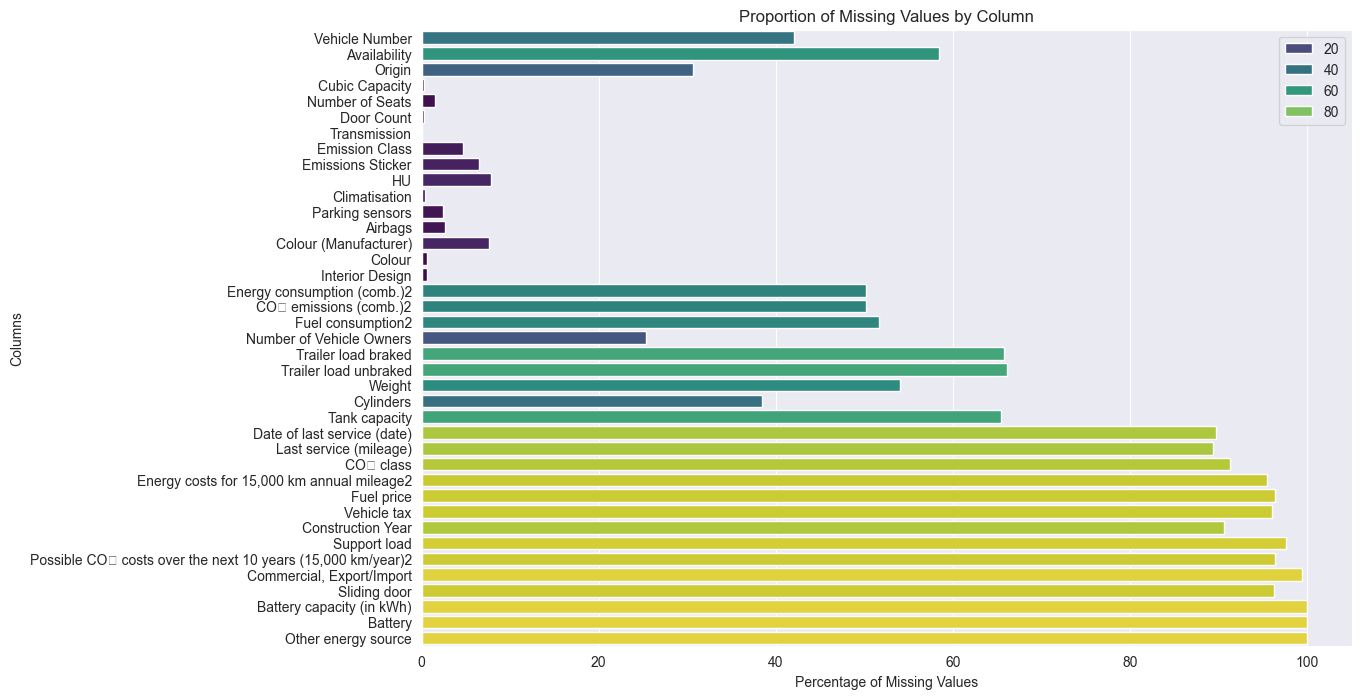

In [8]:
# Calculate the proportion of missing values
missing_values = (data_df.isnull().sum() / len(data_df)) * 100
missing_values = missing_values[missing_values > 0]  # Only focus on columns with missing values

# Plot the missing values
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis", hue=missing_values.values)
plt.title("Proportion of Missing Values by Column")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.show()


In [9]:
# Drop columns with more than 50% missing values
threshold = 50  # Adjust this threshold as needed
columns_to_drop = missing_values[missing_values > threshold].index.tolist()
print(f"Columns with more than {threshold}% missing values: {columns_to_drop}")

data_df_cleaned = data_df.drop(columns=columns_to_drop, axis=1)

# Inspect the cleaned dataset
print("\nCleaned Data Information:")
data_df_cleaned.info()

Columns with more than 50% missing values: ['Availability', 'Energy consumption (comb.)2', 'CO₂ emissions (comb.)2', 'Fuel consumption2', 'Trailer load braked', 'Trailer load unbraked', 'Weight', 'Tank capacity', 'Date of last service (date)', 'Last service (mileage)', 'CO₂ class', 'Energy costs for 15,000 km annual mileage2', 'Fuel price', 'Vehicle tax', 'Construction Year', 'Support load', 'Possible CO₂ costs over the next 10 years (15,000 km/year)2', 'Commercial, Export/Import', 'Sliding door', 'Battery capacity (in kWh)', 'Battery', 'Other energy source']

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle condition         4005 non-null   object 
 1   Category                  4005 non-null   object 
 2   Vehicle Number            2320 non-null   object 
 3   Origin              

Vehicle condition: 4 unique values
Category: 10 unique values
Vehicle Number: 2215 unique values
Origin: 2 unique values
Drive type: 2 unique values
Fuel: 7 unique values
Number of Seats: 7 unique values
Door Count: 3 unique values
Transmission: 2 unique values
Emission Class: 7 unique values
Emissions Sticker: 3 unique values
First Registration: 157 unique values
HU: 47 unique values
Climatisation: 6 unique values
Parking sensors: 60 unique values
Airbags: 4 unique values
Colour (Manufacturer): 815 unique values
Colour: 25 unique values
Interior Design: 39 unique values
Make: 4 unique values
Number of Vehicle Owners: 6 unique values
Cylinders: 5 unique values


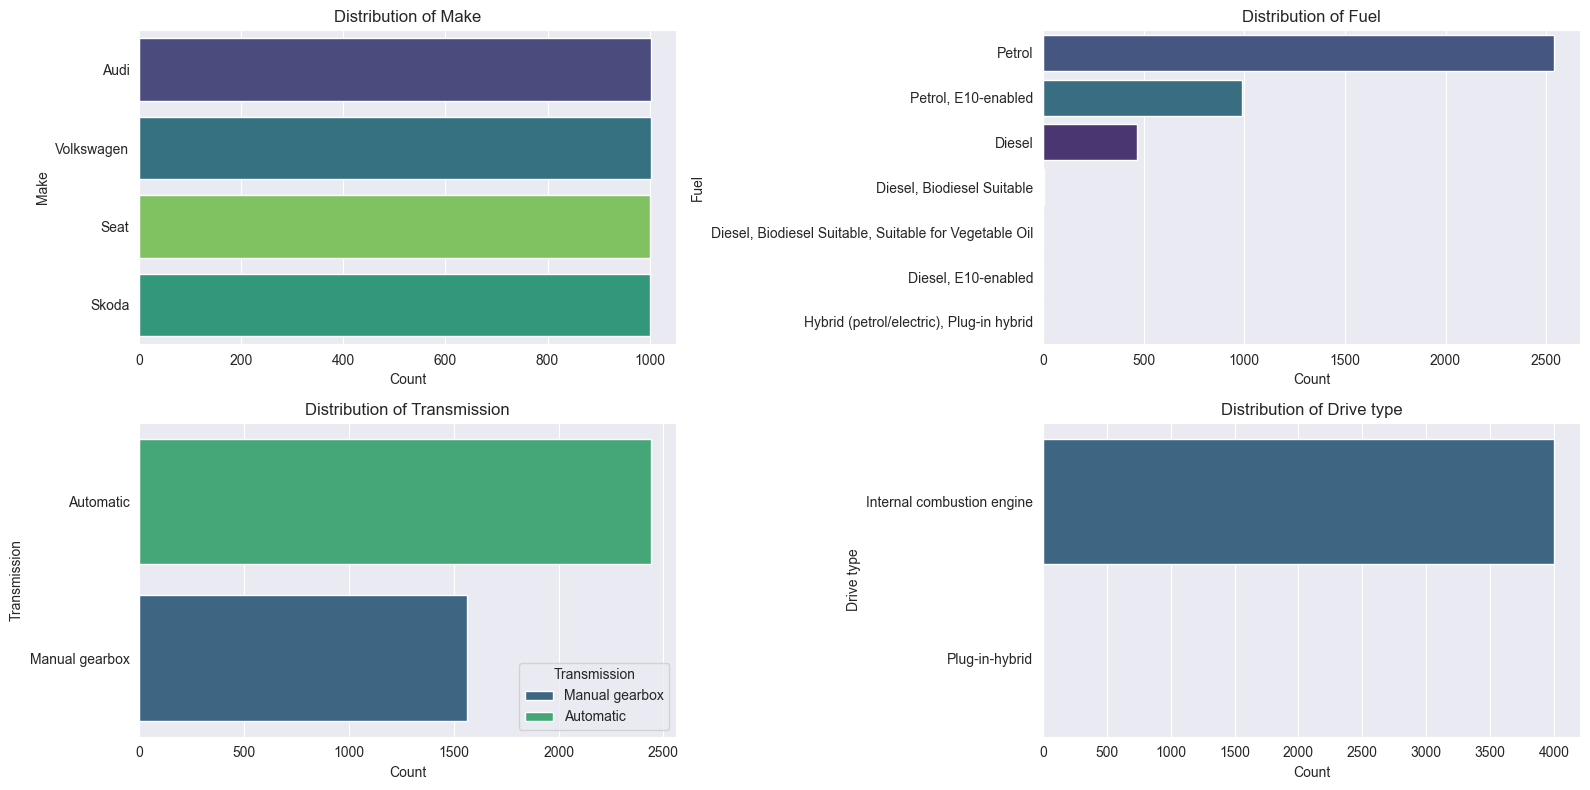

In [10]:
# Get unique values for categorical columns
categorical_columns = data_df_cleaned.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = data_df_cleaned[col].nunique()
    print(f"{col}: {unique_values} unique values")

# Plot the most frequent categories for selected categorical columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(['Make', 'Fuel', 'Transmission', 'Drive type'], start=1):
    plt.subplot(2, 2, i)
    sns.countplot(y=data_df_cleaned[col], order=data_df_cleaned[col].value_counts().index, palette="viridis", hue=data_df_cleaned[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [11]:
# Missing value imputation for important columns
data_df_cleaned['Cubic Capacity'].fillna(data_df_cleaned['Cubic Capacity'].median(), inplace=True)
data_df_cleaned['Power'].fillna(data_df_cleaned['Power'].median(), inplace=True)
data_df_cleaned['Number of Seats'].fillna(data_df_cleaned['Number of Seats'].mode()[0], inplace=True)

# Drop rows with missing values in critical columns (e.g., 'price', 'Mileage')
data_df_cleaned = data_df_cleaned.dropna(subset=['price', 'Mileage'])

# Confirm that missing values are handled
print("\nRemaining Missing Values:")
print(data_df_cleaned.isnull().sum())



Remaining Missing Values:
Vehicle condition              0
Category                       0
Vehicle Number              1685
Origin                      1228
Mileage                        0
Cubic Capacity                 0
Power                          0
Drive type                     0
Fuel                           0
Number of Seats                0
Door Count                    10
Transmission                   4
Emission Class               188
Emissions Sticker            262
First Registration             0
HU                           316
Climatisation                 14
Parking sensors               99
Airbags                      108
Colour (Manufacturer)        304
Colour                        24
Interior Design               26
price                          0
Make                           0
Number of Vehicle Owners    1016
Cylinders                   1537
dtype: int64


/var/folders/y1/ggpn9ns564n68_6c0zwtfhy40000gp/T/ipykernel_11765/3382666867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df_cleaned['Cubic Capacity'].fillna(data_df_cleaned['Cubic Capacity'].median(), inplace=True)
/var/folders/y1/ggpn9ns564n68_6c0zwtfhy40000gp/T/ipykernel_11765/3382666867.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

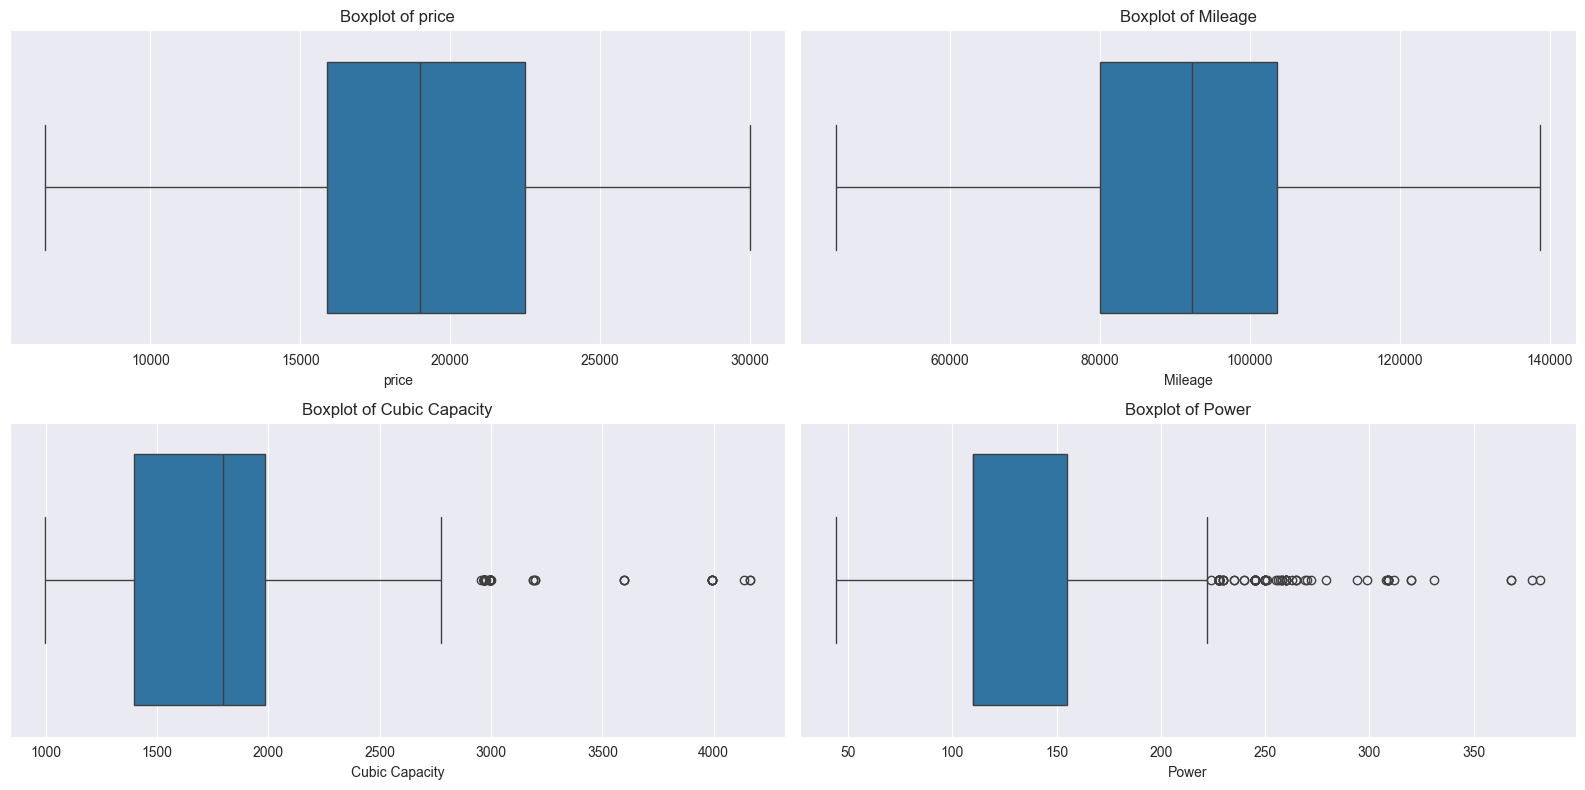


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 3935 entries, 0 to 4004
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle condition         3935 non-null   object 
 1   Category                  3935 non-null   object 
 2   Vehicle Number            2278 non-null   object 
 3   Origin                    2726 non-null   object 
 4   Mileage                   3935 non-null   float64
 5   Cubic Capacity            3935 non-null   float64
 6   Power                     3935 non-null   float64
 7   Drive type                3935 non-null   object 
 8   Fuel                      3935 non-null   object 
 9   Number of Seats           3935 non-null   object 
 10  Door Count                3925 non-null   object 
 11  Transmission              3932 non-null   object 
 12  Emission Class            3749 non-null   object 
 13  Emissions Sticker         3678 non-null   o

In [14]:
# Plot boxplots to identify outliers in numeric columns
numeric_columns = ['price', 'Mileage', 'Cubic Capacity', 'Power']
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_df_cleaned, x=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Handle outliers using the IQR method
for col in ['price', 'Mileage']:
    Q1 = data_df_cleaned[col].quantile(0.25)
    Q3 = data_df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_df_cleaned = data_df_cleaned[(data_df_cleaned[col] >= lower_bound) & (data_df_cleaned[col] <= upper_bound)]

# Print the updated dataset info
print("\nDataset after cleaning:")
data_df_cleaned.info()


In [15]:
# Save the cleaned dataset to a CSV file
data_df_cleaned.to_csv('./data/cleaned_data.csv', index=False)

## Univariate Analysis

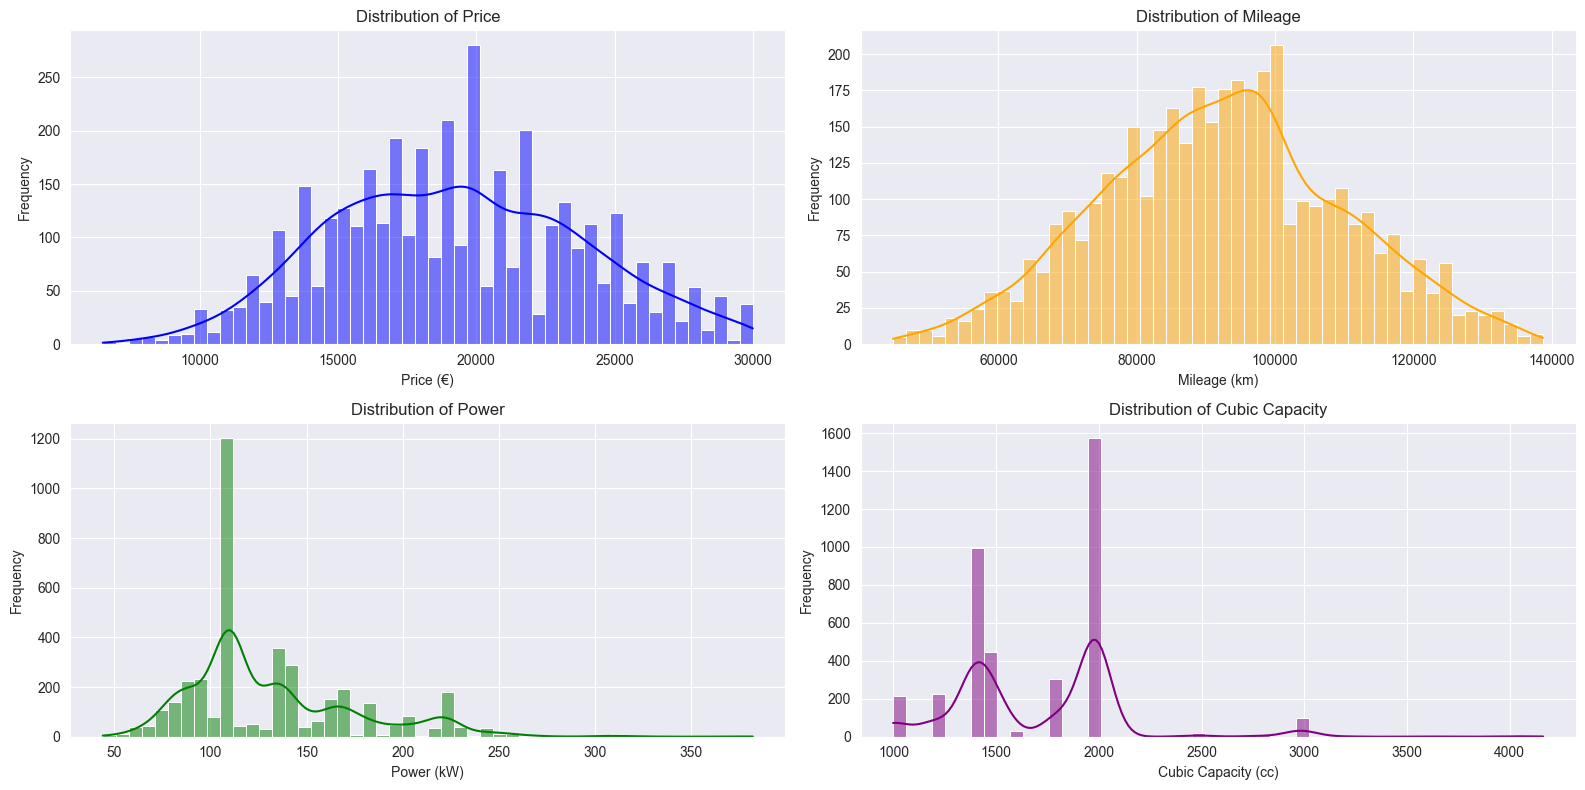

In [16]:
# Univariate Analysis for Key Numeric Features
plt.figure(figsize=(16, 8))

# Price Distribution
plt.subplot(2, 2, 1)
sns.histplot(data_df_cleaned['price'], bins=50, kde=True, color='blue')
plt.title("Distribution of Price")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")

# Mileage Distribution
plt.subplot(2, 2, 2)
sns.histplot(data_df_cleaned['Mileage'], bins=50, kde=True, color='orange')
plt.title("Distribution of Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Frequency")

# Power Distribution
plt.subplot(2, 2, 3)
sns.histplot(data_df_cleaned['Power'], bins=50, kde=True, color='green')
plt.title("Distribution of Power")
plt.xlabel("Power (kW)")
plt.ylabel("Frequency")

# Cubic Capacity Distribution
plt.subplot(2, 2, 4)
sns.histplot(data_df_cleaned['Cubic Capacity'], bins=50, kde=True, color='purple')
plt.title("Distribution of Cubic Capacity")
plt.xlabel("Cubic Capacity (cc)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


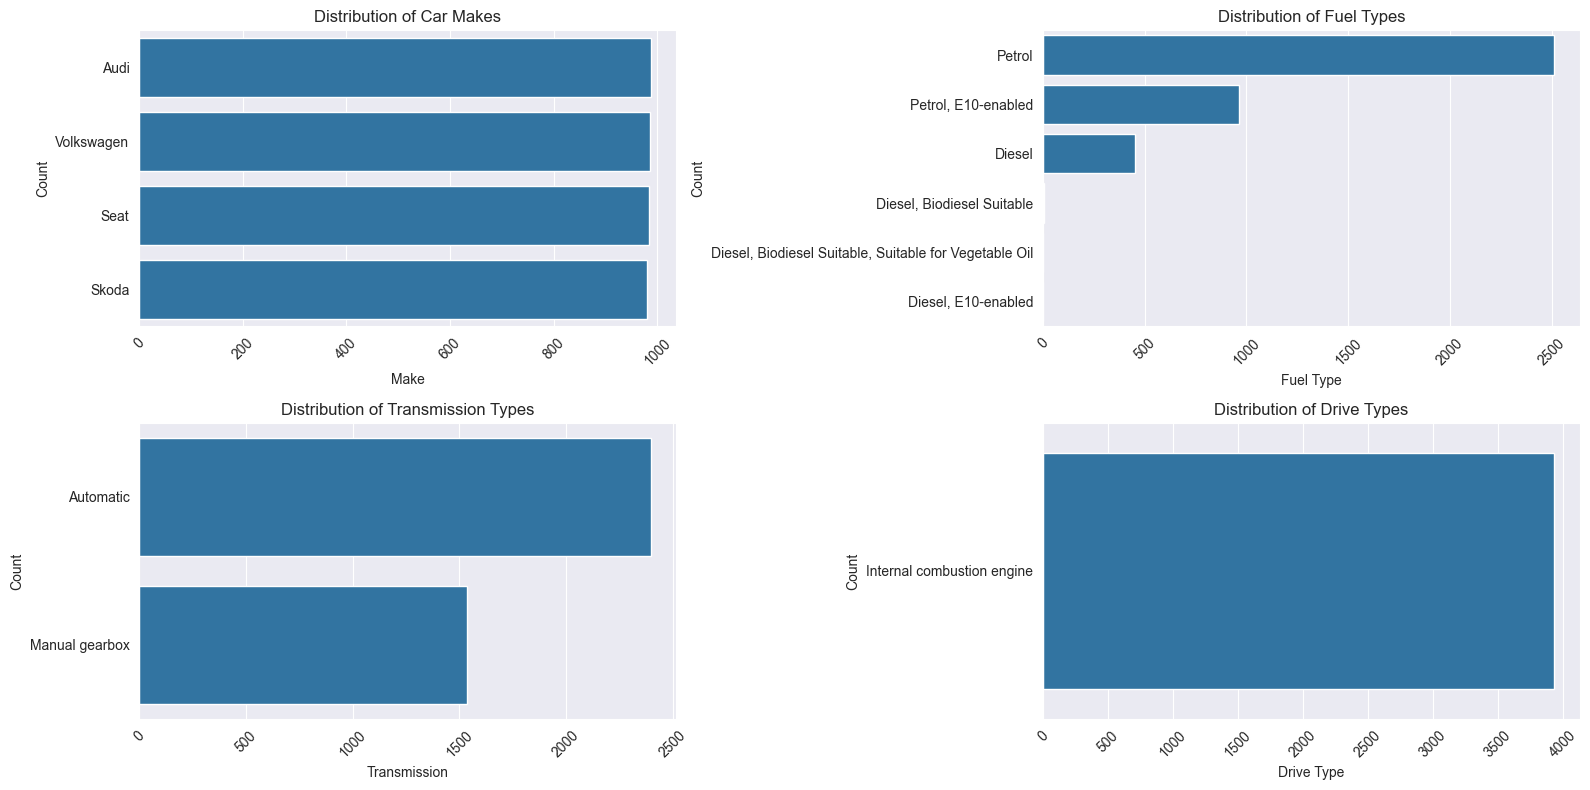

In [17]:
# Univariate Analysis for Key Categorical Features
plt.figure(figsize=(16, 8))

# Make Distribution
plt.subplot(2, 2, 1)
sns.countplot(data_df_cleaned['Make'], order=data_df_cleaned['Make'].value_counts().index)
plt.title("Distribution of Car Makes")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Fuel Distribution
plt.subplot(2, 2, 2)
sns.countplot(data_df_cleaned['Fuel'], order=data_df_cleaned['Fuel'].value_counts().index)
plt.title("Distribution of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Transmission Distribution
plt.subplot(2, 2, 3)
sns.countplot(data_df_cleaned['Transmission'], order=data_df_cleaned['Transmission'].value_counts().index)
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Drive Type Distribution
plt.subplot(2, 2, 4)
sns.countplot(data_df_cleaned['Drive type'], order=data_df_cleaned['Drive type'].value_counts().index)
plt.title("Distribution of Drive Types")
plt.xlabel("Drive Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Conclusions from Univariate Analysis
1. Price
    * The price distribution is normal, with most vehicles priced around €20,000.
    * A small number of luxury or high-end vehicles create outliers at the higher end.

2. Mileage
    * Mileage follows a somewhat bell-shaped curve, with most vehicles between 50,000 km and 140,000 km.
    * Few vehicles have extremely low or high mileage, but they may represent unique cases (e.g., new or heavily used vehicles).

3. Power
    * The power distribution shows a clustering around 100–200 kW, which is common for German vehicles.
    * Vehicles with very high power are rare, likely reflecting high-performance or specialty cars.

4. Cubic Capacity
    * The cubic capacity distribution peaks around 1,500–2,000 cc, which aligns with typical engine sizes for German cars.
    * Larger engines (e.g., above 3,000 cc) are less frequent and likely associated with premium or performance cars.

## Bivariate Analysis
### Purpose:
   To explore relationships between pairs of variables, such as:

* price vs. Mileage
* price vs. Power
* price vs. categorical variables like Make or Fuel

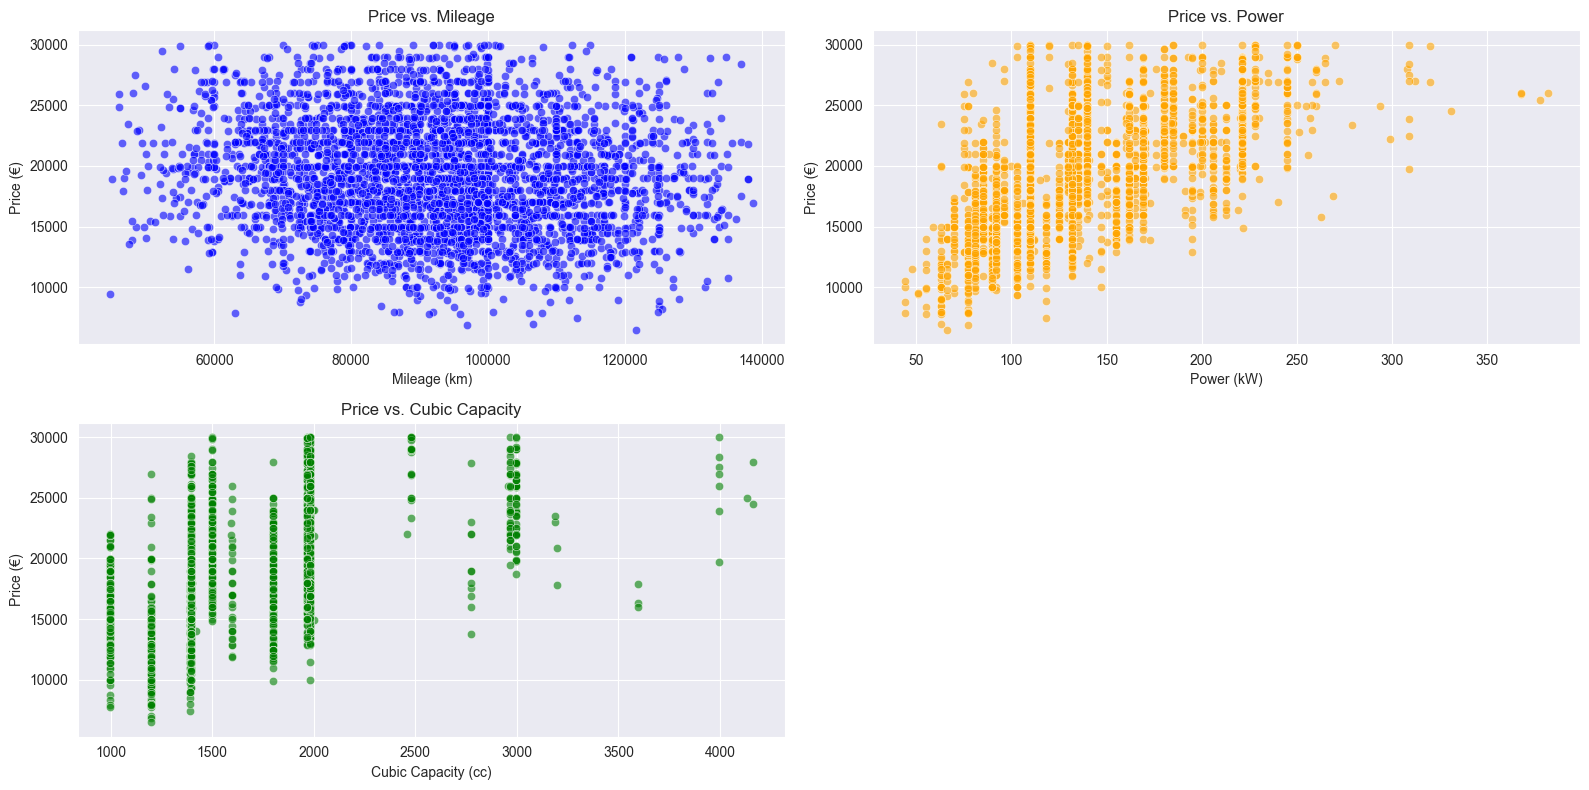

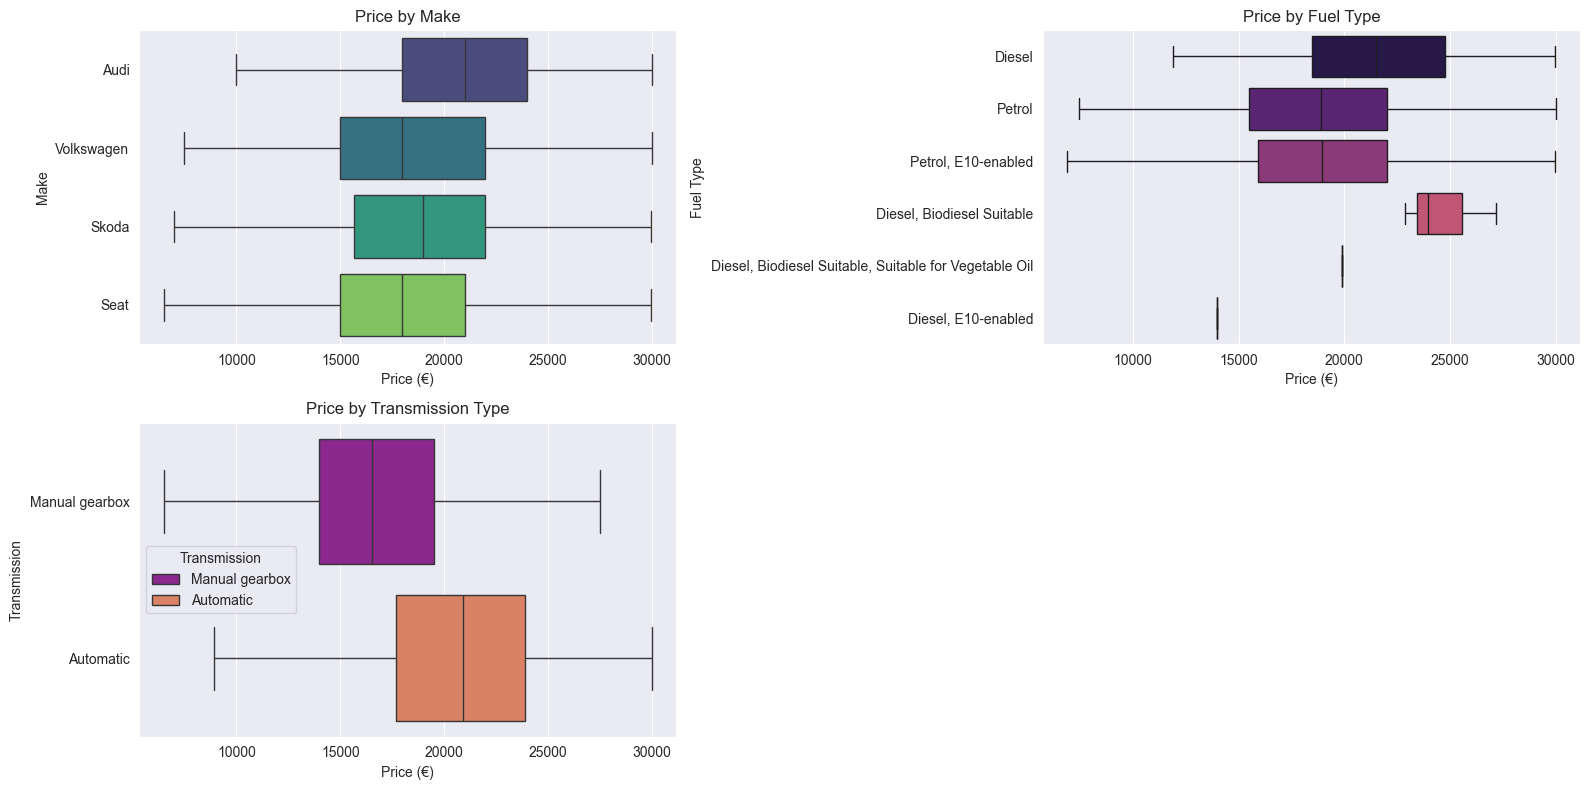

In [18]:
# Bivariate Analysis: Numeric vs. Numeric
plt.figure(figsize=(16, 8))

# Price vs. Mileage
plt.subplot(2, 2, 1)
sns.scatterplot(data=data_df_cleaned, x='Mileage', y='price', alpha=0.6, color='blue')
plt.title("Price vs. Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (€)")

# Price vs. Power
plt.subplot(2, 2, 2)
sns.scatterplot(data=data_df_cleaned, x='Power', y='price', alpha=0.6, color='orange')
plt.title("Price vs. Power")
plt.xlabel("Power (kW)")
plt.ylabel("Price (€)")

# Price vs. Cubic Capacity
plt.subplot(2, 2, 3)
sns.scatterplot(data=data_df_cleaned, x='Cubic Capacity', y='price', alpha=0.6, color='green')
plt.title("Price vs. Cubic Capacity")
plt.xlabel("Cubic Capacity (cc)")
plt.ylabel("Price (€)")

plt.tight_layout()
plt.show()

# Price vs. Categorical Variables
plt.figure(figsize=(16, 8))

# Price by Make
plt.subplot(2, 2, 1)
sns.boxplot(data=data_df_cleaned, x='price', y='Make', palette="viridis", showfliers=False, hue='Make')
plt.title("Price by Make")
plt.xlabel("Price (€)")
plt.ylabel("Make")

# Price by Fuel
plt.subplot(2, 2, 2)
sns.boxplot(data=data_df_cleaned, x='price', y='Fuel', palette="magma", showfliers=False, hue='Fuel')
plt.title("Price by Fuel Type")
plt.xlabel("Price (€)")
plt.ylabel("Fuel Type")

# Price by Transmission
plt.subplot(2, 2, 3)
sns.boxplot(data=data_df_cleaned, x='price', y='Transmission', palette="plasma", showfliers=False, hue='Transmission')
plt.title("Price by Transmission Type")
plt.xlabel("Price (€)")
plt.ylabel("Transmission")

plt.tight_layout()
plt.show()


## Correlation Analysis
### Purpose:
To identify linear relationships between numeric variables and the target variable (price).

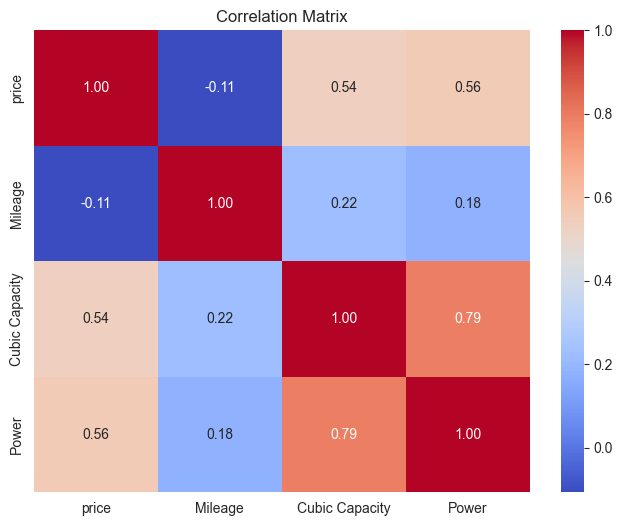

In [19]:
# Correlation Matrix
numeric_cols = ['price', 'Mileage', 'Cubic Capacity', 'Power']
correlation_matrix = data_df_cleaned[numeric_cols].corr()

# Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Multivariate Analysis
### Purpose:
Explore how multiple variables interact, e.g., the effect of Make and Fuel type on price.

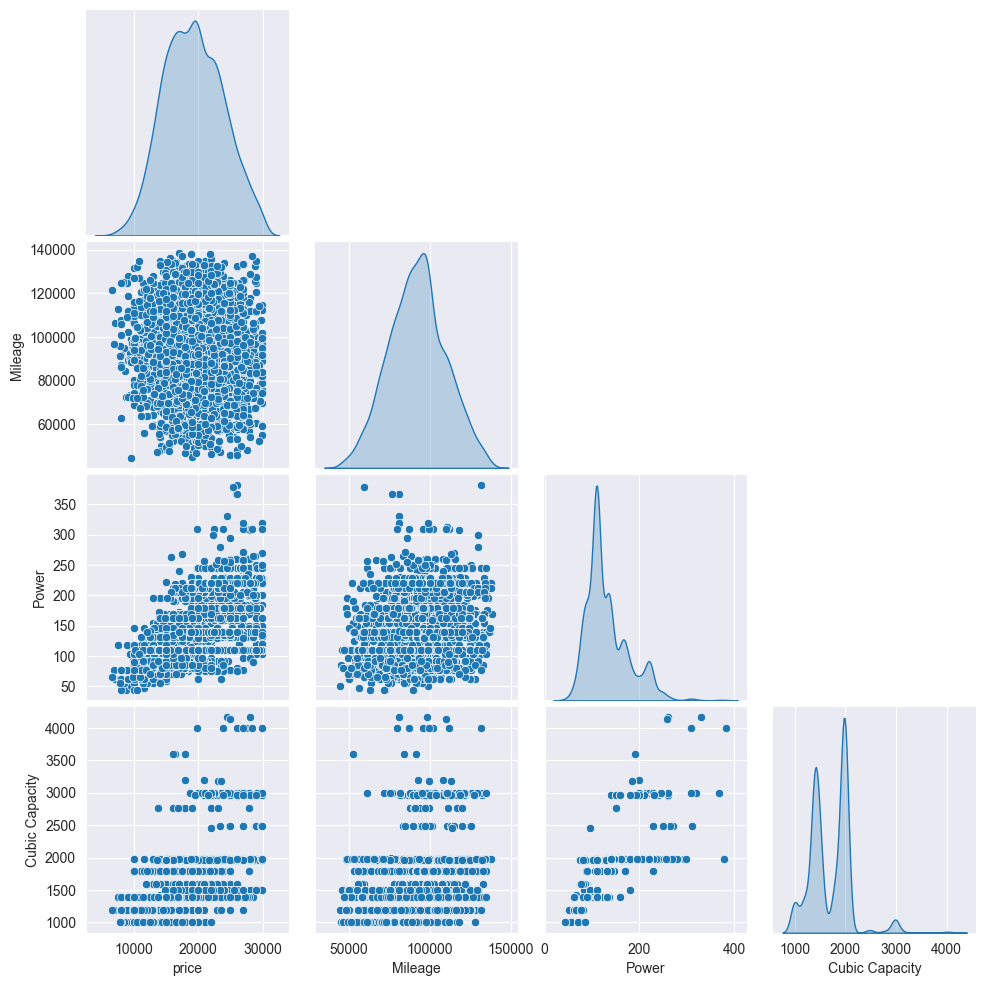

In [20]:
# Pairplot for selected features
selected_features = ['price', 'Mileage', 'Power', 'Cubic Capacity']
sns.pairplot(data_df_cleaned[selected_features], diag_kind='kde', corner=True)
plt.show()

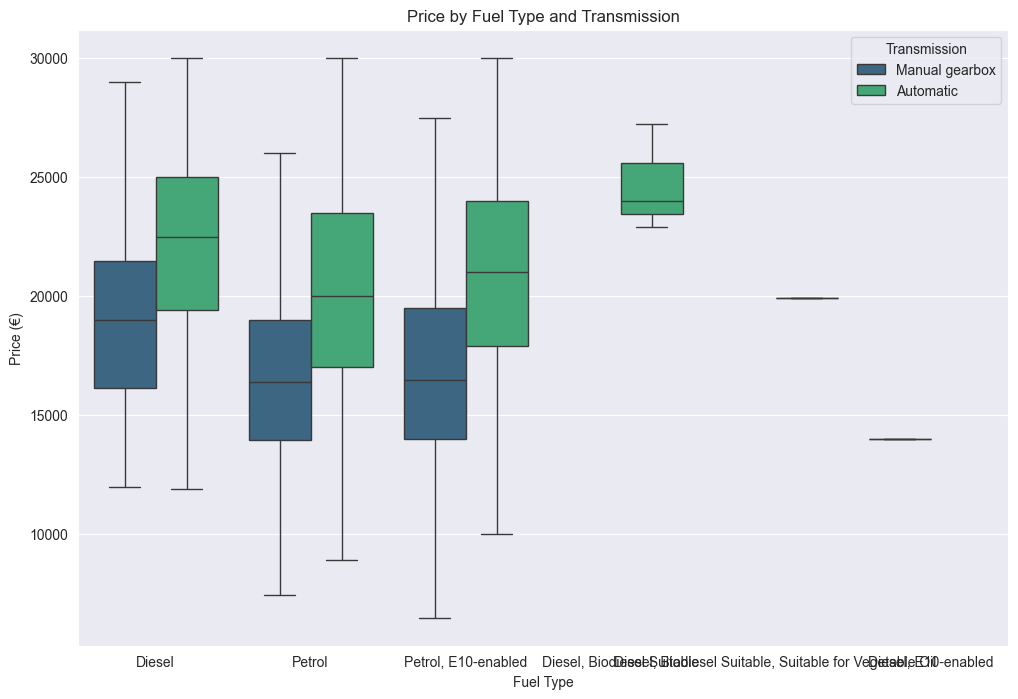

In [21]:
# Boxplot with two categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_df_cleaned, x='Fuel', y='price', hue='Transmission', palette='viridis', showfliers=False)
plt.title("Price by Fuel Type and Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Price (€)")
plt.legend(title="Transmission")
plt.show()

## Conclusions
1. Bivariate Analysis

* Price vs. Mileage:
    * Clear negative relationship: cars with higher mileage generally have lower prices.
    * A few outliers exist (e.g., low-price cars with very low mileage).
* Price vs. Power:
    * Positive relationship: cars with higher power (kW) tend to have higher prices.
    * The trend weakens for vehicles with extremely high power.
* Price vs. Cubic Capacity:
    * Moderate positive relationship: larger engines generally correlate with higher prices.
    * A notable clustering around common cubic capacities (e.g., ~2,000 cc).

2. Price by Categorical Features

* Price by Make:
    * Luxury brands like Audi and BMW have higher median prices compared to Skoda and Volkswagen.
    * Price variance is highest for Audi, reflecting its diverse product range.
* Price by Fuel Type:
    * Diesel cars tend to have slightly higher prices compared to petrol cars.
    * Alternative fuels (e.g., hybrid) appear less frequently but with higher prices.
* Price by Transmission:
    * Automatic vehicles have higher median prices compared to manual ones.
    * Likely reflects demand and technology differences.

3. Correlation Analysis

* Strongest Correlations:
    * Power has a moderately strong positive correlation with price (~0.6).
    * Mileage has a moderate negative correlation with price (~-0.5).
    * Cubic Capacity shows a weaker positive correlation with price (~0.5).

* Key Insights:
    * Engine-related metrics (Power, Cubic Capacity) and Mileage are important predictors of price.
    * Multicollinearity among numeric variables appears limited, which is ideal for modeling.

## Feature Engineering

* Derived Features:
    * Vehicle Age: Extracted from the First Registration column.
    * Mileage per Year: Normalized mileage based on vehicle age.

* Encoded Features:
    * Categorical columns (Make, Fuel, Transmission, Drive type) were one-hot encoded.
    * Other categorical columns containing a high percentage of distinct values which are not relevant for the analysis (Interior Color, for example, we dropped)

* Transformed Features:
    * Log transformations applied to price (Log Price) and Mileage (Log Mileage) to handle skewness.

* Standardized Features:
    * Key numeric features (Mileage, Power, Cubic Capacity, Vehicle Age, Mileage per Year) were standardized to ensure consistent scaling.

In [25]:
# Step 1: Derive Features
current_year = datetime.now().year
data_df_cleaned['First Registration Year'] = data_df_cleaned['First Registration'].str.extract(r'(\d{4})').astype(float)
data_df_cleaned['Vehicle Age'] = current_year - data_df_cleaned['First Registration Year']
data_df_cleaned['Mileage per Year'] = data_df_cleaned['Mileage'] / data_df_cleaned['Vehicle Age']

# Step 2: Encoding All Categorical Variables
# Select columns for one-hot encoding
categorical_columns_to_encode = ['Vehicle condition', 'Make', 'Category', 'Door Count', 'Emission Class', 'Climatisation', 'Parking sensors', 'Airbags', 'Colour', 'Fuel', 'Transmission', 'Drive type']

# Perform one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = pd.DataFrame(
    encoder.fit_transform(data_df_cleaned[categorical_columns_to_encode]),
    columns=encoder.get_feature_names_out(categorical_columns_to_encode),
    index=data_df_cleaned.index
)

# Drop all remaining categorical columns
categorical_columns_to_drop = data_df_cleaned.select_dtypes(include='object').columns
data_df_encoded = pd.concat([data_df_cleaned.drop(columns=categorical_columns_to_drop), encoded_columns], axis=1)

# Step 3: Handle Skewness
data_df_encoded['Log Price'] = np.log1p(data_df_encoded['price'])
data_df_encoded['Log Mileage'] = np.log1p(data_df_encoded['Mileage'])

# Step 4: Standardization
numeric_features = ['Mileage', 'Power', 'Cubic Capacity', 'Vehicle Age', 'Mileage per Year']
scaler = StandardScaler()
data_df_encoded[numeric_features] = scaler.fit_transform(data_df_encoded[numeric_features])

# Verify the updated dataset
print("Feature Engineering Summary:")
print(f"- Encoded Features: {encoder.get_feature_names_out(categorical_columns_to_encode).tolist()}")
print(f"- Dropped Columns: {categorical_columns_to_drop.tolist()}")
print("Transformed Dataset:")
print(data_df_encoded.info())


Feature Engineering Summary:
- Encoded Features: ['Vehicle condition_Used vehicle', 'Vehicle condition_Used vehicle, Accident-free', 'Vehicle condition_Used vehicle, Accident-free, Not roadworthy', 'Vehicle condition_Used vehicle, Repaired accident damage', 'Make_Audi', 'Make_Seat', 'Make_Skoda', 'Make_Volkswagen', 'Category_Cabriolet / Roadster', 'Category_Estate Car', 'Category_Other', 'Category_SUV / Off-road Vehicle / Pickup Truck', 'Category_Saloon', 'Category_Saloon, Demonstration Vehicle', 'Category_Small Car', 'Category_Sports Car / Coupe', 'Category_Van / Minibus', 'Door Count_2/3', 'Door Count_4/5', 'Door Count_6/7', 'Door Count_nan', 'Emission Class_Euro 6e', 'Emission Class_Euro4', 'Emission Class_Euro5', 'Emission Class_Euro6', 'Emission Class_Euro6c', 'Emission Class_Euro6d', 'Emission Class_Euro6d-TEMP', 'Emission Class_nan', 'Climatisation_A/C (man.)', 'Climatisation_Automatic air conditioning', 'Climatisation_Automatic climatisation, 2 zones', 'Climatisation_Automatic 

In [26]:
# Save the final dataset to a CSV file
data_df_encoded.to_csv('./data/processed_data.csv', index=False)